In [1]:
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import pipeline as pi
import importlib


In [3]:
mark=pi.markover("0_0.csv",7)
conzeros=pi.sampler_regressor(mark)[:1][0]
trayectoria1=conzeros[0:len(conzeros)-5]
df1=pd.DataFrame(trayectoria1)
def pulser(dataframe):
    trayect=dataframe[0]
    category=dataframe[0].unique()
    pulsos=np.zeros((len(category),len(dataframe)))
    for t in range(len(dataframe)):
        for i in range(len(category)):
            if trayect[t]==category[i]:
                pulsos[i,t]=1
    return pulsos


In [4]:
conzeros=pi.sampler_regressor(mark)[:1][0]
trayectoria1=conzeros[0:len(conzeros)-5]


In [5]:


df1.to_csv("kujo1.csv")

In [6]:
df1[0].unique()

array([33., 20., 10., 11., 24., 21., 31., 30.])

In [7]:
def pulser(dataframe):
    trayect=dataframe[0]
    category=dataframe[0].unique()
    pulsos=np.zeros((len(category),len(dataframe)))
    for t in range(len(dataframe)):
        for i in range(len(category)):
            if trayect[t]==category[i]:
                pulsos[i,t]=1
    return pulsos




In [8]:
pulsos=pulser(df1)

In [9]:
pulsos

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
!pip install matplotlib
import lif
importlib.reload(lif)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 134.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


<module 'lif' from '/root/work/lif.py'>

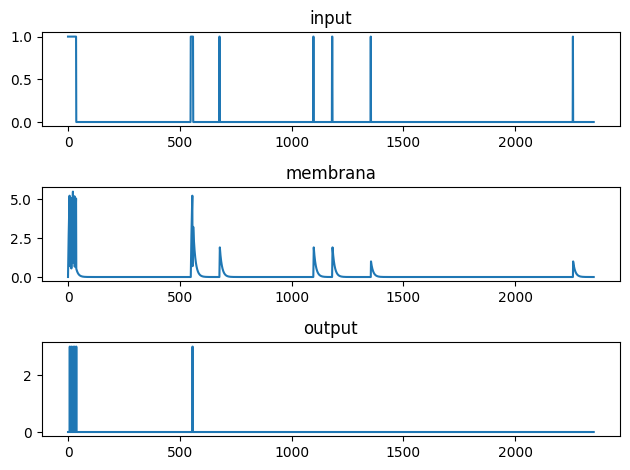

In [11]:
neuron1=lif.lifer([pulsos[0]],0,5,0.9)
neuron1.update()
neuron1.plot()

In [12]:
capa1 = np.empty(pulsos.shape[0], dtype=object)
for i in range(pulsos.shape[0]):
    capa1[i] = lif.lifer([pulsos[i]], 0, 5, 0.9)


In [13]:
capa1

array([<lif.lifer object at 0x7f334e46ef80>,
       <lif.lifer object at 0x7f334e1fdf30>], dtype=object)

In [14]:
capa1[2]

In [15]:
def capita(pulsos, U0, th, B):
    capa1 = np.empty(pulsos.shape[0], dtype=object)
    for i in range(pulsos.shape[0]):
        capa1[i] = lif.lifer([pulsos[i]], U0[i], th[i], B[i])
    return capa1

In [16]:
capita(pulsos, [0,0,0,0,0,0,0,0],[5,5,5,5,5,5,5,5],[0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9])

array([<lif.lifer object at 0x7f334e1fd000>,
       <lif.lifer object at 0x7f33472bdde0>], dtype=object)

In [17]:
def bloque(M, n, p, bloque_anterior):
    #M -> Matriz de incidencia del bloque anterior con el actual que estamos creando
    #n -> Identifica el número de bloque
    #p -> Matriz de parametros de cada neurona
    #bloque_anterior -> bloque anterior
    
    num_neuronas = M.shape[0] #asumiendo que las filas identifican el bloque actual
    bloque_actual = []

    #picos anteriores (rico)
    spikes_anterior = np.array([neuron.spikes for neuron in bloque_anterior])

    for i in range(num_neuronas):
        # Combinar los spikes anteriores según la matriz de incidencia
        entrada = np.dot(M[i], spikes_anterior)

        Uth, B = p[i]
        neurona = lifer([entrada], 0, Uth, B)
        bloque_actual.append(neurona)

    return (n,bloque_actual)


In [10]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 575.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 957.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
import snntorch as snn
import torch